# Intro

In this notebook, we inspect the results of an experiment using `finetune.py`. We fine-tune the model at different levels of granularity and using an increasing number of instances per class. The resulting model is then evaluated on a different file.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os
import glob
import re

# Inspecting the results from finetune.py

## Load test gold labels

In [108]:
test = pd.read_csv('./test_set_ing.EMMA.merged.csv')

## Load results for each experiment

Each file inside `results/` represents an experiment in which we train a model with a specific number of instances per class (`max_per_class`) and at a specific level of granularity (`level`).

In [124]:
data = []

for path in glob.glob('results/finetune/level*/*csv'):
    m = re.match('.*level-([0-9])-max_per_class-([0-9]+).*', path)
    level, max_per_class = m.groups()
    level, max_per_class = int(level), int(max_per_class)
    
    df = pd.read_csv(path, index_col=0)
    rows = pd.DataFrame({'pred': df['pred'].values, 'true': test['level-{}'.format(level)].values})
    rows['level'] = level
    rows['max_per_class'] = max_per_class
    data.append(rows)
    
data = pd.concat(data)

In [125]:
data.head()

,pred,true,level,max_per_class
0,ADJ-ADV,NO-OBJ-GERUND,2,25
1,VERB-GERUND,VERB-GERUND,2,25
2,ADJ-ADV,PPC,2,25
3,ADJ-ADV,NO-OBJ-GERUND,2,25
4,VERB-GERUND,VERB-GERUND,2,25


## Print results metrics

The following cell displays a full classification report for each combination of `level` and `max_per_class`.

In [70]:
for (level, max_per_class), g in data.groupby(['level', 'max_per_class']):
    print(level, max_per_class)
    print(metrics.classification_report(g['true'], g['pred']))

1 1
              precision    recall  f1-score   support

        NAME       1.00      0.33      0.50         6
 NOMINAL-ING       0.48      0.10      0.17       657
        NOUN       0.06      0.03      0.04       160
  PARTICIPLE       0.52      0.54      0.53       729
        VERB       0.01      0.19      0.02        27

    accuracy                           0.30      1579
   macro avg       0.41      0.24      0.25      1579
weighted avg       0.45      0.30      0.32      1579

1 5
              precision    recall  f1-score   support

        NAME       0.05      0.33      0.09         6
 NOMINAL-ING       0.41      0.12      0.18       657
        NOUN       0.12      0.39      0.18       160
  PARTICIPLE       0.59      0.09      0.15       729
        VERB       0.01      0.33      0.02        27

    accuracy                           0.13      1579
   macro avg       0.24      0.25      0.13      1579
weighted avg       0.45      0.13      0.16      1579

1 10
         

/Users/manjavacas/.pyenv/versions/3.8.9/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manjavacas/.pyenv/versions/3.8.9/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manjavacas/.pyenv/versions/3.8.9/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

               precision    recall  f1-score   support

      ADJ-ADV       0.19      0.40      0.26       234
         NAME       0.05      0.50      0.08         6
NO-OBJ-GERUND       0.23      0.03      0.05       240
         NOUN       0.07      0.17      0.10       160
       NP-ING       0.17      0.02      0.03       118
          PPC       0.00      0.00      0.00       452
  PROGRESSIVE       0.06      0.58      0.11        43
         VERB       0.00      0.00      0.00        27
  VERB-GERUND       0.20      0.07      0.11       299

     accuracy                           0.11      1579
    macro avg       0.11      0.20      0.08      1579
 weighted avg       0.12      0.11      0.08      1579

2 50
               precision    recall  f1-score   support

      ADJ-ADV       0.30      0.64      0.41       234
         NAME       0.06      0.50      0.11         6
NO-OBJ-GERUND       0.00      0.00      0.00       240
         NOUN       0.15      0.41      0.22       160
 

/Users/manjavacas/.pyenv/versions/3.8.9/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manjavacas/.pyenv/versions/3.8.9/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manjavacas/.pyenv/versions/3.8.9/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

# Visualization

In order to have a clear overview, we plot micro and macro f1 scores on a single graph.

In [126]:
results = data.groupby(['level', 'max_per_class']).apply(
    lambda g: pd.Series({
        'f1-micro': metrics.f1_score(g['true'], g['pred'], average='micro'),
        'f1-macro': metrics.f1_score(g['true'], g['pred'], average='macro')}))

In [127]:
results_long = pd.melt(
    results.reset_index(), 
    id_vars=['level', 'max_per_class'], value_vars=['f1-micro', 'f1-macro'],
    var_name='metric')

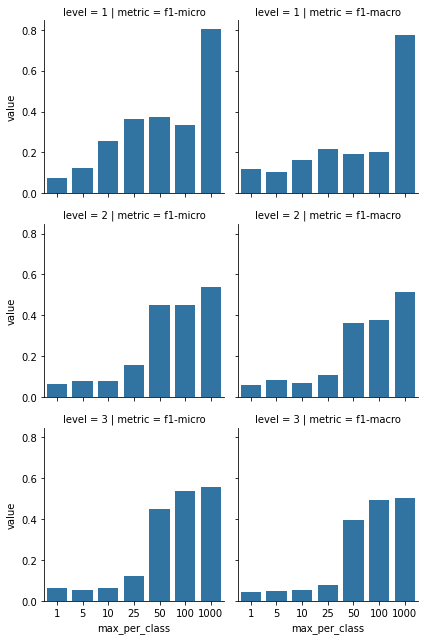

In [128]:
g = sns.FacetGrid(results_long, row='level', col='metric')
g.map_dataframe(sns.barplot, 'max_per_class', 'value')

# CV Results

Here we visualize the results on cross-validated splits of the training data.

In [119]:
data = []

for path in glob.glob('results/finetune-cv/level*/*parquet'):
    m = re.match('.*level-([0-9])-max_per_class-([0-9]+).*', path)
    level, max_per_class = m.groups()
    level, max_per_class = int(level), int(max_per_class)
    
    df = pd.read_parquet(path)
    df['level'] = level
    df['max_per_class'] = max_per_class
    data.append(df)
    
data = pd.concat(data)

In [120]:
data.head()

,fold,test,trues,scores,preds,level,max_per_class
0,0,0,FA-ABS,0.136463,FA-ABS,3,1
1,0,7,FA-ABS,0.148595,G,3,1
2,0,13,FA-ABS,0.155964,VG,3,1
3,0,44,FA-ABS,0.180986,G,3,1
4,0,55,FA-ABS,0.161946,VG,3,1


In [121]:
results = data.groupby(['level', 'max_per_class', 'fold']).apply(
    lambda g: pd.Series({
        'f1-micro': metrics.f1_score(g['trues'], g['preds'], average='micro'),
        'f1-macro': metrics.f1_score(g['trues'], g['preds'], average='macro')}))

In [122]:
results_long = pd.melt(
    results.reset_index(), 
    id_vars=['level', 'max_per_class', 'fold'], value_vars=['f1-micro', 'f1-macro'],
    var_name='metric')

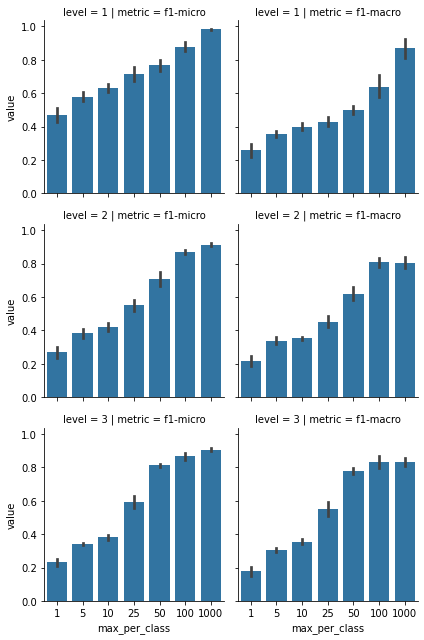

In [123]:
g = sns.FacetGrid(results_long, row='level', col='metric')
g.map_dataframe(sns.barplot, 'max_per_class', 'value')